[*********************100%***********************]  1 of 1 completed
Max Drawdown:  -0.5299519985248617
CAGR:  0.8964018675808787


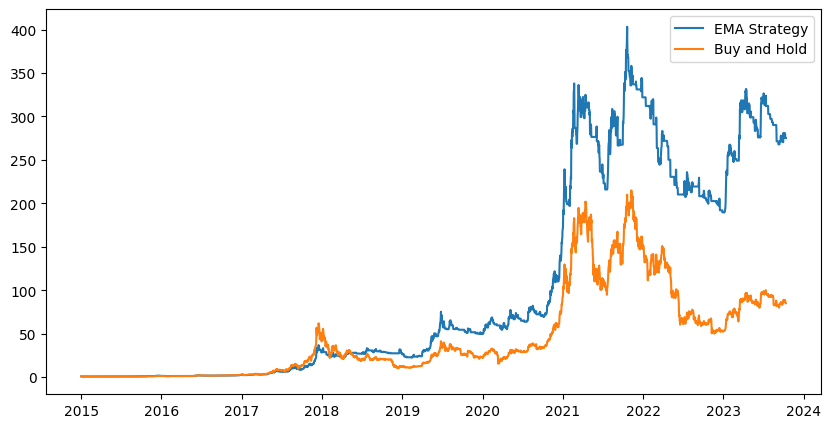

In [12]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Download historical data
data = yf.download('BTC-USD', start="2015-01-01")

# Calculate the EMA
data['ema10'] = data['Close'].ewm(span=10, adjust=False).mean()

# Create a signal when the close price crosses the EMA10
data['above_ema10'] = data['Close'] > data['ema10']

# Forward fill our signals
data['positions'] = data['above_ema10'].replace({False: 0, True: 1}).ffill()

# Calculate daily percentage returns of strategy
data['strategy_returns'] = data['Close'].pct_change() * data['positions'].shift()

# Calculate cumulative returns of strategy
data['strategy_cumulative_returns'] = (data['strategy_returns'] + 1).cumprod()

# Buy and Hold returns
data['buy_and_hold_returns'] = data['Close'].pct_change()

# Cumulative Buy and Hold returns
data['buy_and_hold_cumulative_returns'] = (data['buy_and_hold_returns'] + 1).cumprod()

# Calculate max drawdown
rolling_max = data['strategy_cumulative_returns'].cummax()
daily_drawdown = data['strategy_cumulative_returns']/rolling_max - 1.0
max_daily_drawdown = daily_drawdown.min()
print("Max Drawdown: ", max_daily_drawdown)

# Calculate CAGR
years = (data['strategy_cumulative_returns'].index[-1] - data['strategy_cumulative_returns'].index[0]).days / 365.25
cagr = (data['strategy_cumulative_returns'][-1])**(1/years) - 1
print("CAGR: ", cagr)

# Plot the equity curves of the strategy and the buy and hold
plt.figure(figsize=(10,5))
plt.plot(data['strategy_cumulative_returns'], label='EMA Strategy')
plt.plot(data['buy_and_hold_cumulative_returns'], label='Buy and Hold')
plt.legend()
plt.show()